**Table of contents**<a id='toc0_'></a>    
- [Testing the loading of topography data](#toc1_)    
  - [Measurement areas from RHK Rev](#toc1_1_)    
  - [Checking positions and oritentations](#toc1_2_)    
    - [Rotations](#toc1_2_1_)    
- [Testing up - down scan](#toc2_)    
- [map](#toc3_)    
  - [absolute, relative coordinates](#toc3_1_)    
    - [Maps, images](#toc3_1_1_)    
    - [Iz map](#toc3_1_2_)    
    - [Line spectra](#toc3_1_3_)    
- [Testing incomplete images](#toc4_)    
- [Background subtraction in images](#toc5_)    
- [Background subtraction and peak fitting in spectra](#toc6_)    
- [$dI/dV$ line spectra](#toc7_)    
- [single spectra](#toc8_)    
  - [trying line spectra](#toc8_1_)    
- [Implementing $I(z)$ spectra](#toc9_)    
  - [Iz map](#toc9_1_)    
  - [Iz single spectrum](#toc9_2_)    
- [Iz line spectrum](#toc10_)    
- [Implementing repetitions](#toc11_)    
- [Plotting spectrum positions](#toc12_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

In [85]:
import sys
sys.path.insert(0, '../')
import rhkpy

import matplotlib.pyplot as pl
import numpy as np
import xarray as xr
from scipy import ndimage
import hvplot.xarray

# <a id='toc1_'></a>[Testing the loading of topography data](#toc0_)

## <a id='toc1_1_'></a>[Measurement areas from RHK Rev](#toc0_)

measurement position in the whole 2x2 umxum scan area:

![image.png](attachment:image.png)

Position of the spectroscopy map: 'MK_ABC_FLG_25_9K_2023_07_21_10_34_03_339.sm4'
The tip position is at the spot where this spectrum was taken: 'dI-dV_MK_ABC_FLG_25_9K_2023_07_21_15_28_46_376.sm4'

![image.png](attachment:image.png)

## <a id='toc1_2_'></a>[Checking positions and oritentations](#toc0_)

In [3]:
datapath = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\ABC\STM\stacking faults\FLG25(9) - 6 layer' + '\\'
filename_m339 = 'MK_ABC_FLG_25_9K_2023_07_21_10_34_03_339.sm4'
filename_s376 = 'dI-dV_MK_ABC_FLG_25_9K_2023_07_21_15_28_46_376.sm4'
m339 = rhkpy.rhkdata(datapath + filename_m339)
s376 = rhkpy.rhkdata(datapath + filename_s376)

In [4]:
# load using the old loader
m339_old = rhkpy.load_rhksm4(datapath + filename_m339)

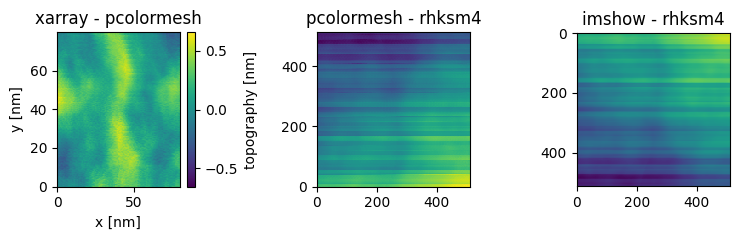

In [5]:
fig, (ax1, ax2, ax3) = pl.subplots(1, 3, figsize = (7.5, 2.5))
m339.image.topography[:, :, 0].plot(ax = ax1, cmap = 'viridis')
ax2.pcolormesh(m339_old._pages[6].data)
ax3.imshow(m339_old._pages[6].data)

ax1.set_title('xarray - pcolormesh')
ax2.set_title('pcolormesh - rhksm4')
ax3.set_title('imshow - rhksm4')
pl.tight_layout()

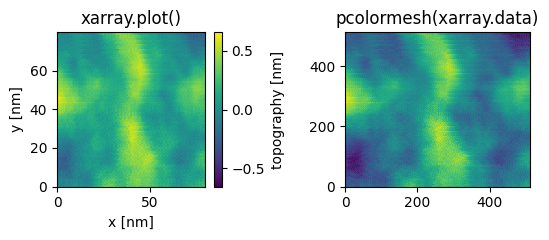

In [6]:
fig, (ax1, ax2) = pl.subplots(1, 2, figsize = (5.5, 2.5))
m339.image.topography[:, :, 0].plot(ax = ax1, cmap = 'viridis')
pl.pcolormesh(m339.image.topography[:, :, 0].data)

ax1.set_title('xarray.plot()')
ax2.set_title('pcolormesh(xarray.data)')
pl.tight_layout()

Trying offsets on the above data

Offsets from RHK Rev:
- x: -547
- y: 429.4

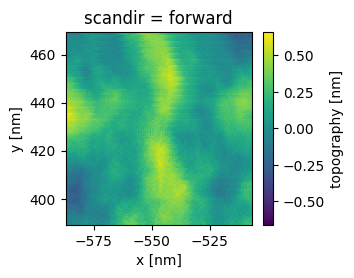

In [7]:
fig, ax = pl.subplots(1, 1, figsize = (3, 2.5))

m339_abs = rhkpy.coord_to_absolute(m339.image)
_ = m339_abs['topography'][:, :, 0].plot(cmap = 'viridis')

Plotting the position of the single spectrum

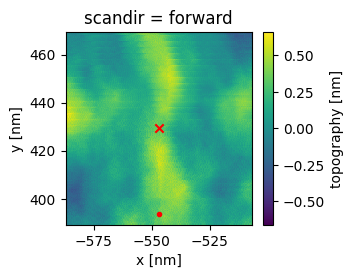

In [8]:
fig, ax = pl.subplots(1, 1, figsize = (3, 2.5))

m339_abs = rhkpy.coord_to_absolute(m339.image)
m339_abs['topography'][:, :, 0].plot(cmap = 'viridis')
pl.scatter(-547, 429.4, color = 'r', marker = 'x')
_ = pl.scatter(s376.spectra.attrs['speccoord_x'], s376.spectra.attrs['speccoord_y'], color = 'r', marker = '.')

Fits well to the position shown by Rev 9:

![image.png](attachment:image.png)

### <a id='toc1_2_1_'></a>[Rotations](#toc0_)
Rotations from the 30 deg rotated topography image from Konrad

![image.png](attachment:image.png)

In [4]:
datapath = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\RHK Test Python Code\30 fok kep + spektrum' + '\\'
topo = 'MK_ABC_FLG_26_9K_2023_05_19_11_11_33_321.sm4'
topo = rhkpy.rhkdata(datapath + topo)

# single spectrum
filename_s826 = 'dI-dV_MK_ABC_FLG_26_9K_2023_05_19_11_14_16_826.sm4'
s826 = rhkpy.rhkdata(datapath + filename_s826)
filename_s854 = 'dI-dV_MK_ABC_FLG_26_9K_2023_05_19_11_21_55_854.sm4'
s854 = rhkpy.rhkdata(datapath + filename_s854)

In [5]:
topo.image.attrs['scan angle']

30.0

-740.047539693478 -815.5595310199715


(-900.0, -700.0)

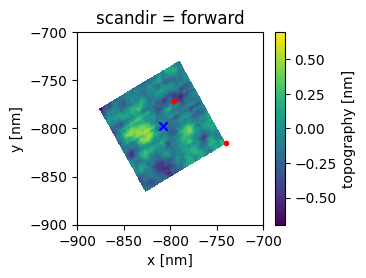

In [6]:
fig, ax = pl.subplots(1, 1, figsize = (3, 2.5))

topo_rot = rhkpy.coord_to_absolute(topo.image)
topo_rot['topography'][:, :, 0].plot(cmap = 'viridis')
pl.scatter(-808, -797, color = 'b', marker = 'x')
pl.scatter(s854.spectra.attrs['speccoord_x'], s854.spectra.attrs['speccoord_y'], color = 'r', marker = '.')
pl.scatter(s826.spectra.attrs['speccoord_x'], s826.spectra.attrs['speccoord_y'], color = 'r', marker = '.')
print(s826.spectra.attrs['speccoord_x'], s826.spectra.attrs['speccoord_y'])
pl.xlim([-900, -700])
pl.ylim([-900, -700])

In [9]:
topo_rot.topography[:, :, 0].hvplot()

:Image   [y,x]   (topography)

# <a id='toc2_'></a>[Testing up - down scan](#toc0_)

In [12]:
datapath = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\RHK Test Python Code\up - down scan' + '\\'
topoup = 'gold_9K_2019_12_18_14_03_28_256.sm4'
topodown = 'gold_9K_2019_12_18_14_07_48_716.sm4'

In [13]:
tup = rhkpy.rhkdata(datapath + topoup)
tdown = rhkpy.rhkdata(datapath + topodown)

stmdatastruct not tested for RHK Rev version < 6. Some things might not work as expected.
stmdatastruct not tested for RHK Rev version < 6. Some things might not work as expected.


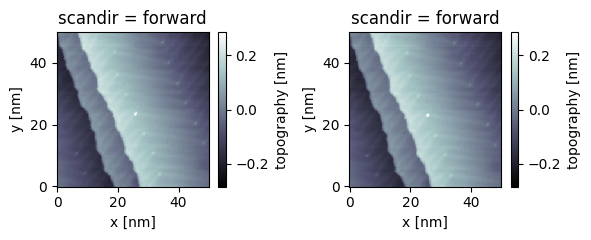

In [14]:
fig, (ax1, ax2) = pl.subplots(1, 2, figsize = (6, 2.5))
tup.image['topography'][:, :, 0].plot(cmap = 'bone', ax = ax1)
tdown.image['topography'][:, :, 0].plot(cmap = 'bone', ax = ax2)
pl.tight_layout()

For some reason xarray, switches the x and y coordinates. This is why they are switched in _xr_image

In [15]:
data = np.zeros((5, 5))
x = np.linspace(0, 5, num = 5)
y = np.linspace(0, 5, num = 5)

In [4]:
ds = xr.Dataset(
		data_vars = dict(
			d = (['x', 'y'], data)
			),
		coords = dict(
			x = x,
			y = y
            )
		)

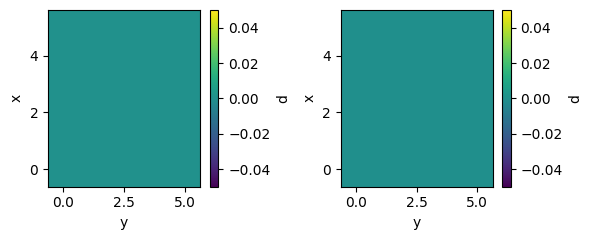

In [6]:
fig, (ax1, ax2) = pl.subplots(1, 2, figsize = (6, 2.5))
ds.d.plot.pcolormesh(ax = ax1)
ds.d.plot.imshow(ax = ax2)
pl.tight_layout()

# <a id='toc3_'></a>[map](#toc0_)

## <a id='toc3_1_'></a>[absolute, relative coordinates](#toc0_)

### <a id='toc3_1_1_'></a>[Maps, images](#toc0_)

rotation in the screenshot for map "...06_505":

![image.png](attachment:image.png)

In [76]:
folder = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\RHK Test Python Code\30 fok dIdV terkep' + '\\'
filename_map_30deg = 'MK_ABC_FLG_26_9K_2023_05_19_12_12_06_505.sm4'
map_30deg = rhkpy.rhkdata(folder + filename_map_30deg)

In [64]:
m_abs = map_30deg.coord_to_absolute()

In [78]:
m_abs.image.attrs['scan angle']

30.0

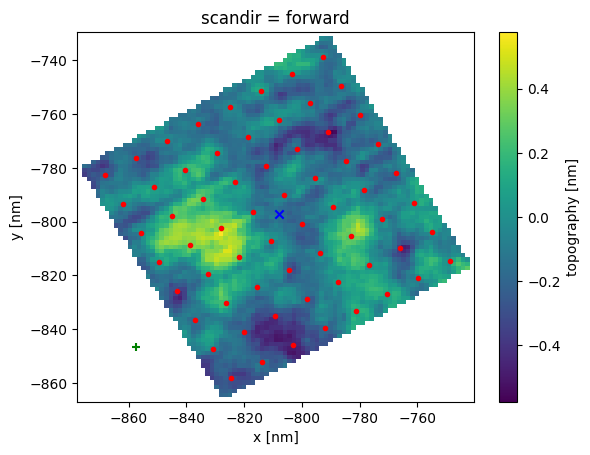

In [77]:
map_30deg_abs = map_30deg.coord_to_absolute()
map_30deg_abs.image['topography'][:, :, 0].plot(cmap = 'viridis')
pl.scatter(-808, -797, color = 'b', marker = 'x')
pl.scatter(map_30deg.spectra.x.data, map_30deg.spectra.y.data, color = 'r', marker = '.')
pl.scatter(map_30deg_abs.image.attrs['xoffset'], map_30deg_abs.image.attrs['yoffset'], color = 'g', marker = '+')

In [13]:
map_30deg_abs.image.topography[:, :, 0].hvplot()

:Image   [y,x]   (topography)

180 degree map

In [14]:
folder = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\ABC\STM\stacking faults\FLG25(9) - 6 layer' + '\\'
filename_map_180deg = 'MK_ABC_FLG_25_9K_2023_08_02_08_42_02_808.sm4'
map_180deg = rhkpy.rhkdata(folder + filename_map_180deg)

(650.0, 850.0)

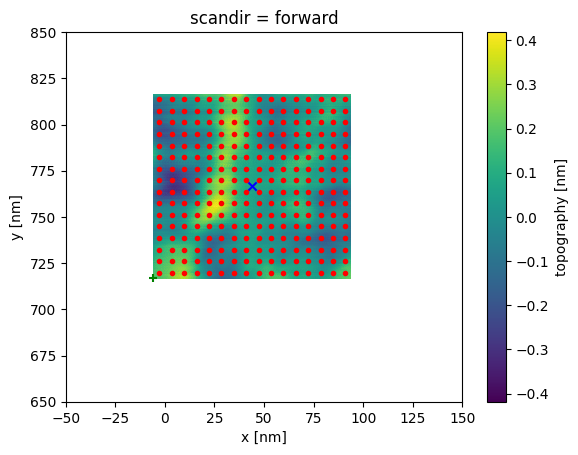

In [79]:
rotated_180 = rhkpy.coord_to_absolute(map_180deg.image)
rotated_180['topography'][:, :, 0].plot(cmap = 'viridis')
pl.scatter(44, 767, color = 'b', marker = 'x')
pl.scatter(map_180deg.spectra.x.data, map_180deg.spectra.y.data, color = 'r', marker = '.')
pl.scatter(map_180deg.image.attrs['xoffset'], map_180deg.image.attrs['yoffset'], color = 'g', marker = '+')
pl.xlim([-50, 150])
pl.ylim([650, 850])

-30 deg map

In [16]:
folder = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\ABC\STM\sample 6\sample 6 doping maps\measurement set - 11.10' + '\\'
filename_map_m30deg = '9K_ABC6_2020_11_15_11_53_22_539.sm4'
map_m30deg = rhkpy.rhkdata(folder + filename_map_m30deg)

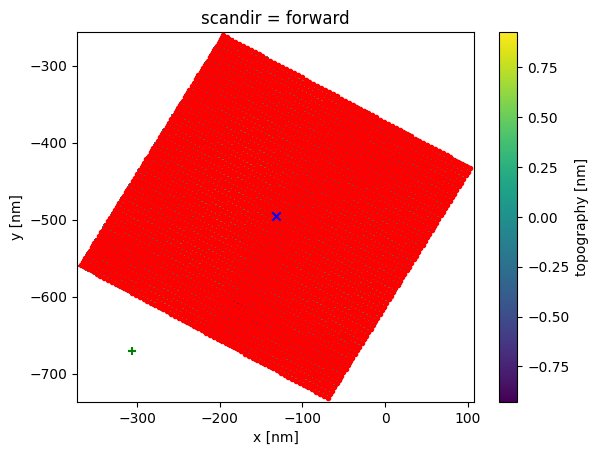

In [17]:
rotated_m30 = rhkpy.coord_to_absolute(map_m30deg.image)
rotated_m30['topography'][:, :, 0].plot(cmap = 'viridis')
pl.scatter(map_m30deg.spectra.x.data, map_m30deg.spectra.y.data, color = 'r', marker = '.')
pl.scatter(-131.6, -495.8, color = 'b', marker = 'x')
pl.scatter(map_m30deg.image.attrs['xoffset'], map_m30deg.image.attrs['yoffset'], color = 'g', marker = '+')

In [56]:
datapath = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\cikkek - published\2022\RG magnetism\figures\splitting' + '\\'
filename_map209 = '9K_ABC6_2020_11_02_08_47_19_209.sm4'
map209 = rhkpy.rhkdata(datapath + filename_map209)

(-250.0, -50.0)

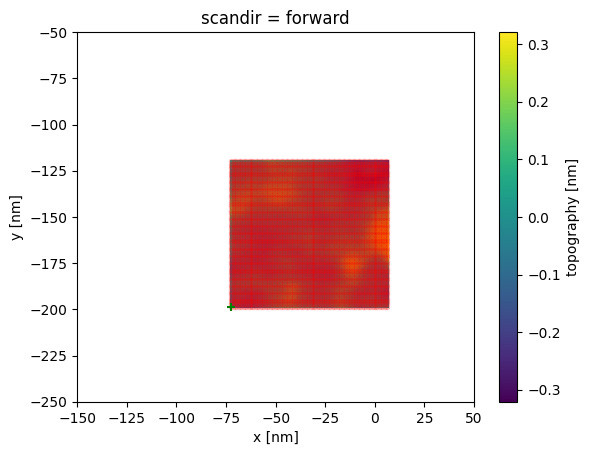

In [57]:
rotated209 = rhkpy.coord_to_absolute(map209.image)
rotated209['topography'][:, :, 0].plot(cmap = 'viridis')
pl.scatter(map209.spectra.x.data, map209.spectra.y.data, color = 'r', marker = '.', alpha = 0.2)
pl.scatter(map209.image.attrs['xoffset'], map209.image.attrs['yoffset'], color = 'g', marker = '+')
pl.xlim([-150, 50])
pl.ylim([-250, -50])

In [20]:
datapath = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\RHK Test Python Code\0 fok dIdV terkepek' + '\\'
filename_map_0deg = 'MK_ABC_FLG_26_9K_2023_05_19_10_41_20_280.sm4'
map_0deg = rhkpy.rhkdata(datapath + filename_map_0deg)

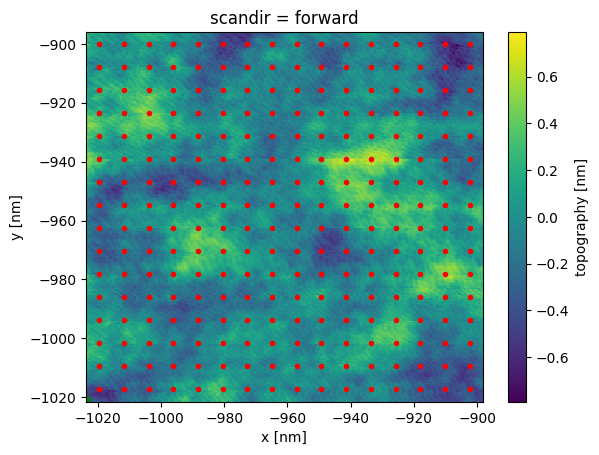

In [21]:
rotated_0 = rhkpy.coord_to_absolute(map_0deg.image)
rotated_0.topography[:, :, 0].plot(cmap = 'viridis')
pl.scatter(map_0deg.spectra.x.data, map_0deg.spectra.y.data, color = 'r', marker = '.')
pl.scatter(map_0deg.image.attrs['xoffset'], map_0deg.image.attrs['yoffset'], color = 'g', marker = '+')

### <a id='toc3_1_2_'></a>[Iz map](#toc0_)

-10 degree IZ spectrum map

In [22]:
filename_izmap = 'Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743.sm4'
izmap = rhkpy.rhkdata(filename_izmap)

In [60]:
izmap_abs = izmap.coord_to_absolute()

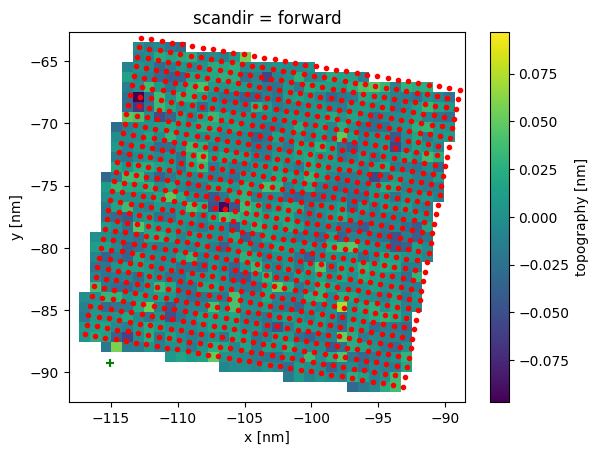

In [61]:
izmap_abs.image.topography[:, :, 0].plot(cmap = 'viridis')
pl.scatter(izmap.spectra.x.data, izmap.spectra.y.data, color = 'r', marker = '.')
pl.scatter(izmap.image.attrs['xoffset'], izmap.image.attrs['yoffset'], color = 'g', marker = '+')

In [31]:
izmap.spectra

<xarray.Dataset>
Dimensions:      (z: 51, specpos_x: 32, specpos_y: 32, repetitions: 10,
                  zscandir: 2)
Coordinates:
  * z            (z) float64 0.0 0.01 0.02 0.03 0.04 ... 0.46 0.47 0.48 0.49 0.5
  * specpos_x    (specpos_x) float64 -88.91 -89.68 -90.45 ... -112.0 -112.8
  * specpos_y    (specpos_y) float64 -67.3 -68.07 -68.84 ... -90.38 -91.15
  * repetitions  (repetitions) int32 0 1 2 3 4 5 6 7 8 9
  * zscandir     (zscandir) <U4 'up' 'down'
Data variables:
    current      (z, specpos_x, specpos_y, repetitions, zscandir) float64 85....
    x            (specpos_x, specpos_y) float64 -88.91 -89.68 ... -116.2 -117.0
    y            (specpos_x, specpos_y) float64 -67.3 -67.17 ... -87.08 -86.95
Attributes: (12/15)
    filename:           Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743...
    bias:               1.0
    bias units:         V
    setpoint:           79.99999968033578
    setpoint units:     pA
    measurement date:   09/08/21
    ...                 ...
    LI amplitude unit:  mV
    LI frequency:       1266.9999999999998
    LI frequency unit:  Hz
    LI phase:           -104.9999999
    datatype:           map
    spectype:           iz

### <a id='toc3_1_3_'></a>[Line spectra](#toc0_)

In [49]:
filename_line = 'line_9K_ABC6_2020_11_01_12_12_27_213.sm4'
linespec = rhkpy.rhkdata(filename_line)

Line spec position in the image:

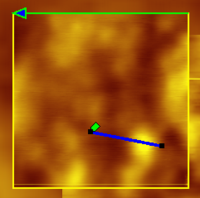

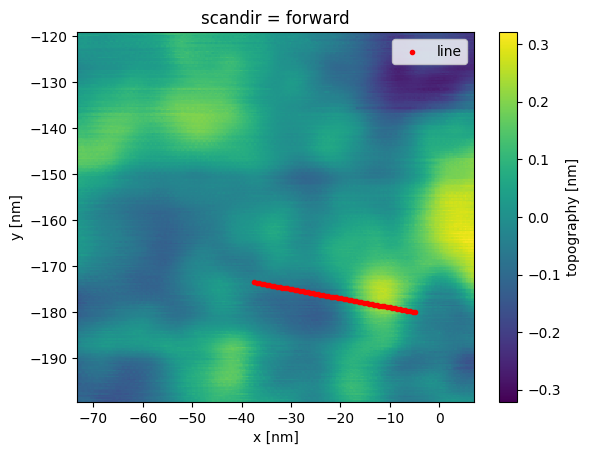

In [58]:
map209_abs = map209.coord_to_absolute()
map209_abs.image.topography[:, :, 0].plot(cmap = 'viridis')
pl.scatter(linespec.spectra.x.data, linespec.spectra.y.data, color = 'r', marker = '.', label = 'line')
pl.legend()


In [62]:
linespec.coord_to_absolute()

Sorry, linespectra are not supportet yet.


# <a id='toc4_'></a>[Testing incomplete images](#toc0_)

In [141]:
datapath = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\tip calibration - Au 111' + '\\'
topofilename = 'gold_9K_2019_12_18_13_36_26_631.sm4'
topo_incomplete = rhkpy.rhkdata(datapath + topofilename)

stmdatastruct not tested for RHK Rev version < 6. Some things might not work as expected.


In [142]:
topo_incomplete_abs = topo_incomplete.coord_to_absolute()

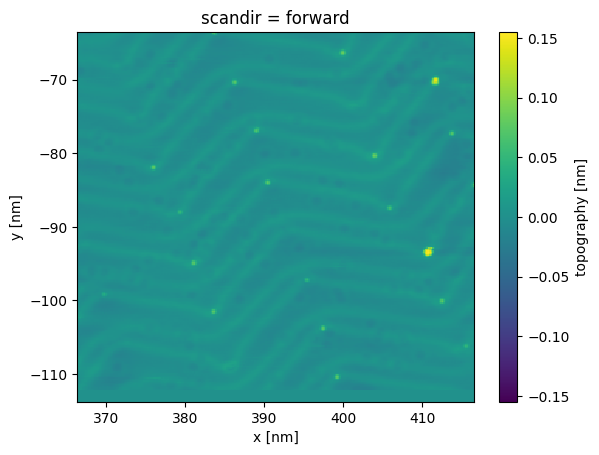

In [143]:
topo_incomplete_abs.image.topography[:, :, 0].plot(cmap = 'viridis')

# <a id='toc5_'></a>[Background subtraction in images](#toc0_)

In [80]:
datapath = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\cikkek - published\2022\RG magnetism\figures\splitting' + '\\'
filename_map209 = '9K_ABC6_2020_11_02_08_47_19_209.sm4'
map209 = rhkpy.rhkdata(datapath + filename_map209, loadraw = True)

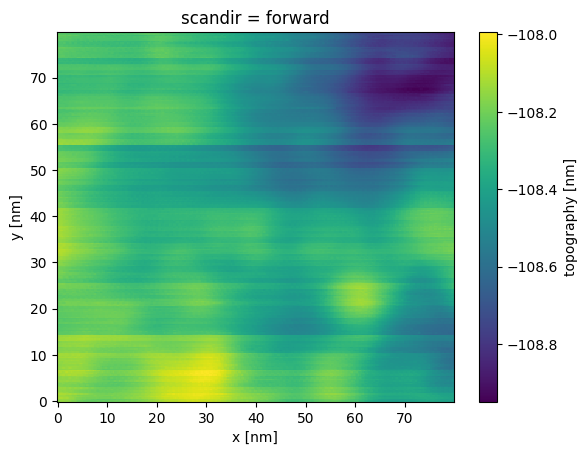

In [112]:
map209.image.topography[:, :, 0].plot(cmap = 'viridis')

In [137]:
flat = map209.polyflatten(hmax = 10, polyorder = 6)

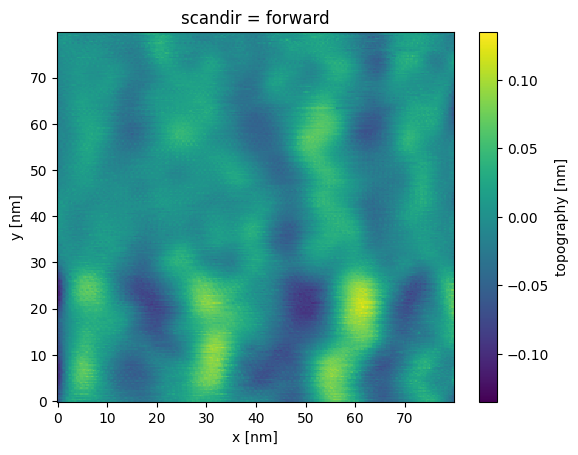

In [138]:
flat.image.topography[:, :, 0].plot(cmap = 'viridis')

In [139]:
flat = rhkpy.polyflatten(map209.image, polyorder = 0)

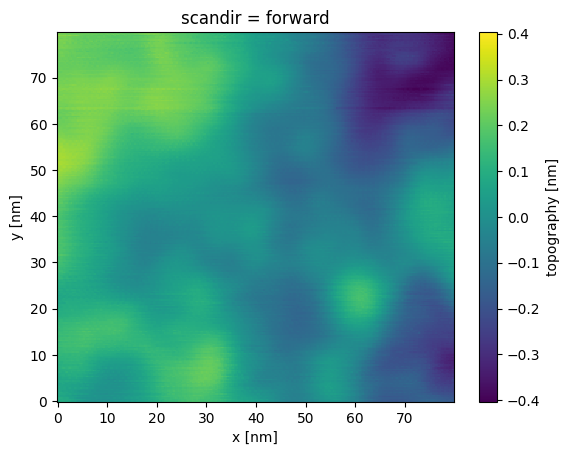

In [140]:
flat.topography[:, :, 0].plot(cmap = 'viridis')

# <a id='toc6_'></a>[Background subtraction and peak fitting in spectra](#toc0_)

In [22]:
temp = map_30deg.spectra.sel(repetitions = 0, biasscandir = 'left')['lia'][:, 6, 3]
temp_map = map_30deg.spectra.sel(repetitions = 0, biasscandir = 'left')['lia']

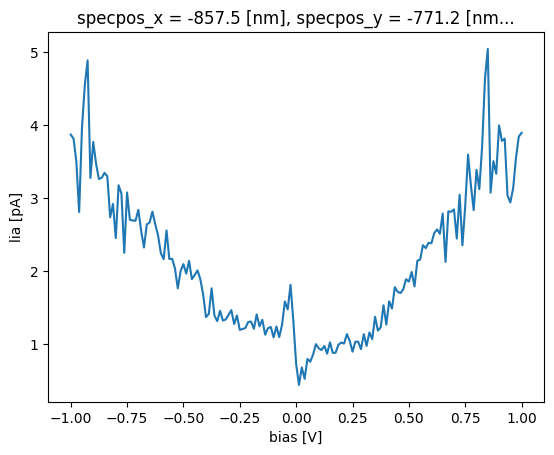

In [23]:
temp.plot()

Try to remove background

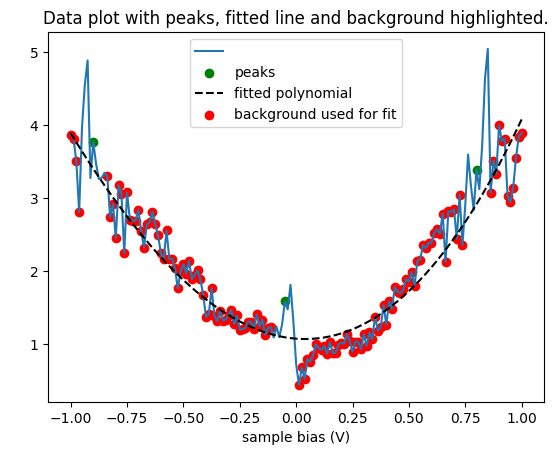

In [24]:
y_data_nobg, bg_values, coeff, params_used_at_run, mask, covar = rhkpy.bgsubtract(temp.bias.data, temp.data, toplot = True, peak_pos = [-0.9, -0.05, 0.8])

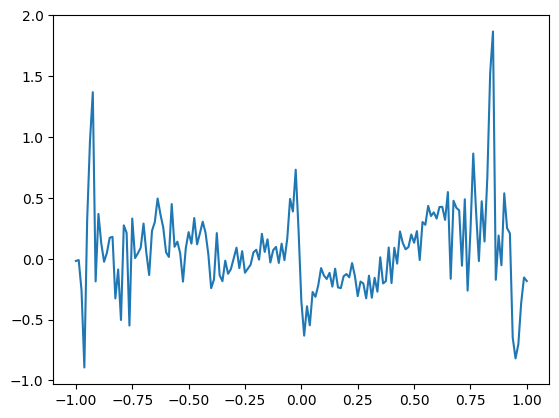

In [25]:
pl.plot(temp.bias.data, y_data_nobg)

In [26]:
temp2 = temp.copy()
temp2.data = y_data_nobg

In [27]:
starting_values = {'x0': -0.03, 'ampl': 0.8, 'width': 0.03}

Values of starting parameters: 
 {'x0': -0.03, 'ampl': 0.8, 'width': 0.03, 'offset': 0} 

Values of fitted parameters:

x0 : -0.04
ampl : 0.77
width : 0.03
offset : -0.14


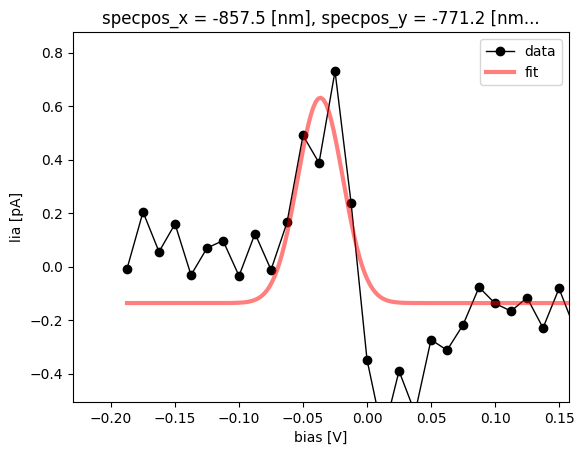

In [28]:
fit = rhkpy.peakfit(temp2.sel(bias = slice(0.2, -0.2)), stval = starting_values, toplot = True)

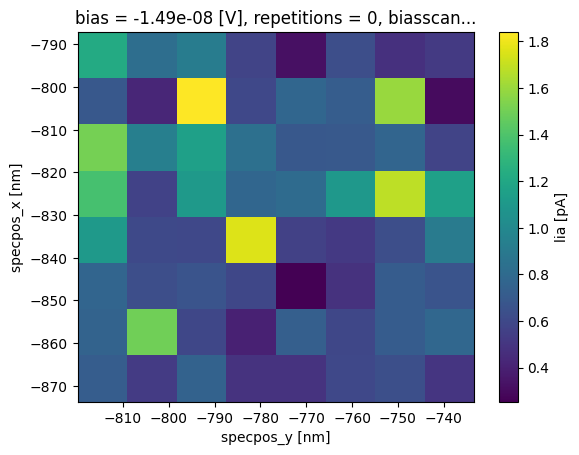

In [29]:
temp_map.sel(bias = 0, method='nearest').plot()

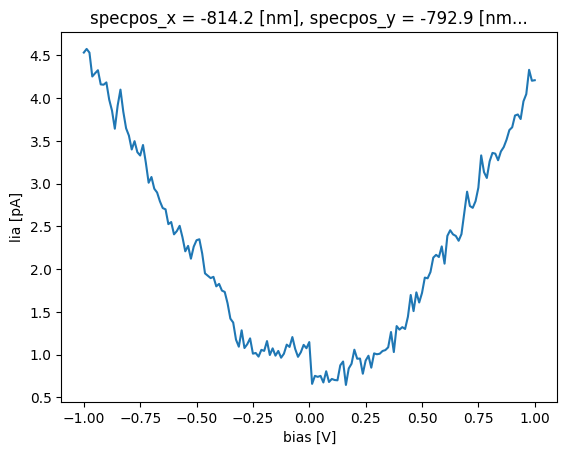

In [30]:
temp_map.sel(specpos_x = -813, specpos_y = -791, method = 'nearest').plot()

Values of starting parameters: 
 {'x0': -0.03, 'ampl': 0.8, 'width': 0.03, 'offset': 0} 

Values of fitted parameters:

x0 : -0.03
ampl : 1.25
width : 0.02
offset : 0.91


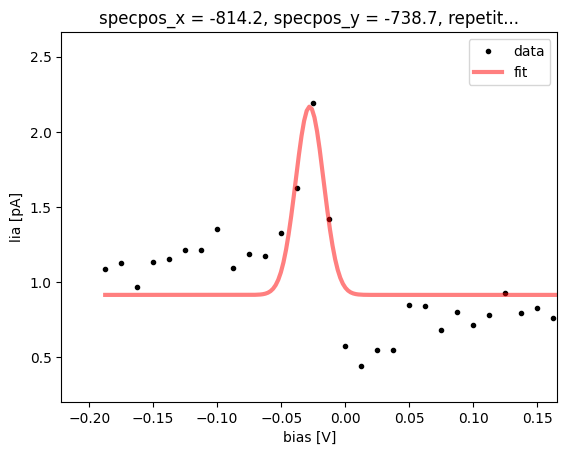

In [31]:
fitmap = rhkpy.peakfit(temp_map.sel(bias = slice(0.2, -0.2)), stval=starting_values, toplot=True, pos_x=-813, pos_y=-741)

In [32]:
img = fitmap['curvefit_coefficients'].sel(param = 'width').hvplot.image(cmap = 'viridis')
hist = fitmap['curvefit_coefficients'].sel(param = 'width').hvplot.hist()

In [33]:
hist.opts(xlabel = 'peak width (V)', height = 250, width = 400) + img.opts(height = 150, title = 'peak width (V)')

:Layout
   .NdOverlay.I :NdOverlay   [Element]
      :Histogram   [curvefit_coefficients]   (curvefit_coefficients_count)
   .Image.I     :Image   [specpos_y,specpos_x]   (curvefit_coefficients)

# <a id='toc7_'></a>[$dI/dV$ line spectra](#toc0_)

In [144]:
# Load dI/dV spectra, measured along a line
filename = 'line_9K_ABC6_2020_11_01_12_12_27_213.sm4'
linespec = rhkpy.rhkdata(filename)

In [146]:
linespec.spectra

<xarray.Dataset>
Dimensions:      (bias: 501, dist: 64, repetitions: 1, biasscandir: 2)
Coordinates:
  * bias         (bias) float64 0.5 0.498 0.496 0.494 ... -0.496 -0.498 -0.5
  * dist         (dist) float64 0.0 0.5279 1.056 1.584 ... 32.2 32.73 33.26
  * repetitions  (repetitions) int32 0
  * biasscandir  (biasscandir) <U5 'left' 'right'
Data variables:
    lia          (bias, dist, repetitions, biasscandir) float64 3.585 ... 5.185
    current      (bias, dist, repetitions, biasscandir) float64 99.49 ... -132.7
    x            (dist) float64 -37.48 -36.97 -36.45 ... -5.902 -5.384 -4.866
    y            (dist) float64 -173.5 -173.6 -173.7 ... -179.7 -179.9 -180.0
Attributes: (12/15)
    filename:           line_9K_ABC6_2020_11_01_12_12_27_213.sm4
    bias:               0.49999988
    bias units:         V
    setpoint:           99.99999439624929
    setpoint units:     pA
    measurement date:   11/01/20
    ...                 ...
    LI amplitude unit:  mV
    LI frequency:       1300.0
    LI frequency unit:  Hz
    LI phase:           -102.9999998
    datatype:           line
    spectype:           iv

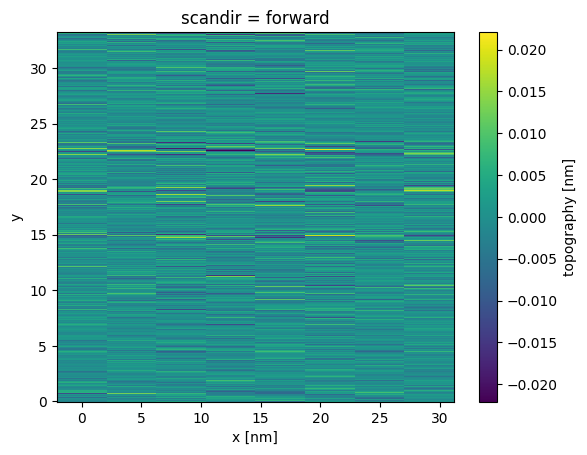

In [148]:
linespec.image.topography[:, :, 0].plot(cmap = 'viridis')

In [47]:
rhkpy.conf_hvplot_defaults()

In [48]:
linespec.spectra.isel(biasscandir = 0, repetitions = 0)['lia'].hvplot.image(cmap = 'viridis')

:Image   [dist,bias]   (lia)

In [99]:
linespec_lia = linespec.spectra.sel(biasscandir = 'left', repetitions = 0)['lia']
linespec_lia.sel(dist = slice(7, 9)).hvplot.line(x = 'bias', by = 'dist')

:NdOverlay   [dist]
   :Curve   [bias]   (lia)

# <a id='toc8_'></a>[single spectra](#toc0_)

In [149]:
filename_singlespec = 'dI-dV_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_23_58_152.sm4'
spec = rhkpy.rhkdata(filename_singlespec)

In [150]:
specmap = rhkpy.rhkdata('dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_33_632.sm4')

In [62]:
spec.spectra

<xarray.Dataset>
Dimensions:      (bias: 481, repetitions: 3, biasscandir: 2)
Coordinates:
  * bias         (bias) float64 0.6 0.5975 0.595 0.5925 ... -0.595 -0.5975 -0.6
  * repetitions  (repetitions) int64 0 1 2
  * biasscandir  (biasscandir) <U5 'left' 'right'
Data variables:
    lia          (bias, repetitions, biasscandir) float64 1.446 1.554 ... 0.9922
    current      (bias, repetitions, biasscandir) float64 44.3 49.2 ... -35.42
    x            float64 -97.14
    y            float64 -73.08
Attributes: (12/18)
    filename:           dI-dV_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_23_58_152.sm4
    speccoord_x:        -97.14440096786348
    speccoord_y:        -73.07891536356692
    speccoord_x units:  nm
    speccoord_y units:  nm
    bias:               0.59999996
    ...                 ...
    LI amplitude unit:  mV
    LI frequency:       1266.9999999999998
    LI frequency unit:  Hz
    LI phase:           -104.9999999
    datatype:           spec
    spectype:           iv

In [151]:
specmap.spectra

<xarray.Dataset>
Dimensions:      (bias: 501, specpos_x: 32, specpos_y: 32, repetitions: 1,
                  biasscandir: 2)
Coordinates:
  * bias         (bias) float64 0.5 0.498 0.496 0.494 ... -0.496 -0.498 -0.5
  * specpos_x    (specpos_x) float64 -465.3 -468.5 -471.6 ... -559.1 -562.2
  * specpos_y    (specpos_y) float64 -730.7 -733.8 -736.9 ... -824.4 -827.5
  * repetitions  (repetitions) int32 0
  * biasscandir  (biasscandir) <U5 'left' 'right'
Data variables:
    lia          (bias, specpos_x, specpos_y, repetitions, biasscandir) float64 ...
    current      (bias, specpos_x, specpos_y, repetitions, biasscandir) float64 ...
    x            (specpos_x, specpos_y) float64 -465.3 -468.5 ... -559.1 -562.2
    y            (specpos_x, specpos_y) float64 -730.7 -730.7 ... -827.5 -827.5
Attributes: (12/15)
    filename:           dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_33_632...
    bias:               0.5
    bias units:         V
    setpoint:           100.0000013351432
    setpoint units:     pA
    measurement date:   08/23/21
    ...                 ...
    LI amplitude unit:  mV
    LI frequency:       1250.0
    LI frequency unit:  Hz
    LI phase:           -102.9999998
    datatype:           map
    spectype:           iv

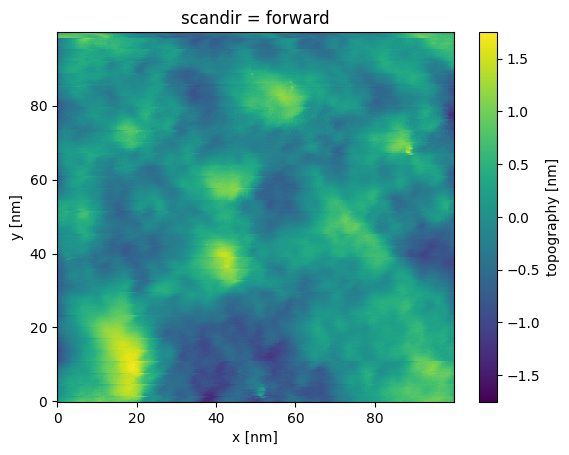

In [152]:
specmap.image.topography[:, :, 0].plot(cmap = 'viridis')

In [66]:
specmap.image.y

<xarray.DataArray 'y' (y: 512)>
array([ 0.      ,  0.195313,  0.390625, ..., 99.414064, 99.609376, 99.804689])
Coordinates:
  * y        (y) float64 0.0 0.1953 0.3906 0.5859 ... 99.22 99.41 99.61 99.8
Attributes:
    units:       nm
    long units:  nanometer
    note:        slow scan direction\n

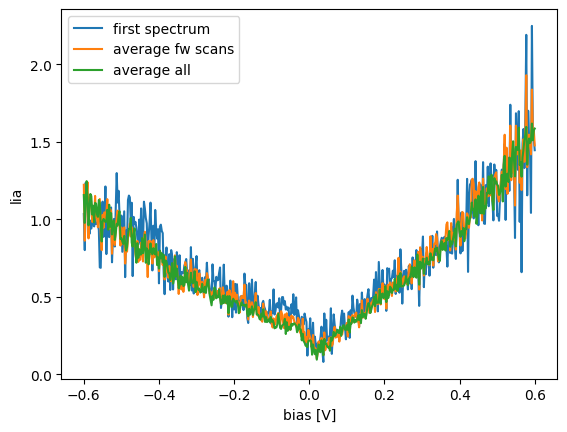

In [153]:
spec.spectra.isel(repetitions = 0, biasscandir = 0)['lia'].plot(label = 'first spectrum')
spec.spectra.isel(biasscandir = 0).mean(dim='repetitions')['lia'].plot(label = 'average fw scans')
spec.spectra.mean(dim=['repetitions', 'biasscandir'])['lia'].plot(label = 'average all')
pl.legend()

## <a id='toc8_1_'></a>[trying line spectra](#toc0_)

In [68]:
linespec = rhkpy.rhkdata(filename_line)

In [69]:
linespec.spymdata.Topography_Forward.attrs['RHK_Angle']

168.75032

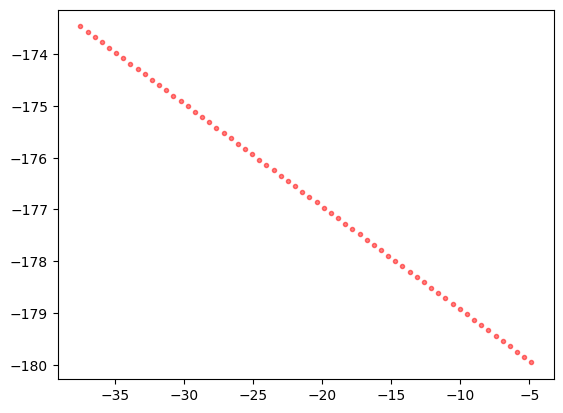

In [70]:
pl.scatter(linespec.spectra.x.data, linespec.spectra.y.data, marker = '.', alpha = 0.5, color = 'r')

# <a id='toc9_'></a>[Implementing $I(z)$ spectra](#toc0_)

## <a id='toc9_1_'></a>[Iz map](#toc0_)

In [35]:
filename_izmap = 'Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743.sm4'
izmap = rhkpy.rhkdata(filename_izmap)

In [17]:
izmapspym = rhkpy.load_spym(filename_izmap)

In [121]:
print(izmap.datatype, izmap.spectype, izmap.repetitions)

map iz 10


In [19]:
izmap.image.attrs

{'filename': 'Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743.sm4',
 'xoffset': -115.0443512398791,
 'yoffset': -89.23446900843679,
 'xoffset_units': 'nm',
 'yoffset_units': 'nm',
 'bias': 1.0,
 'bias units': 'V',
 'setpoint': 79.99999968033578,
 'setpoint units': 'pA',
 'measurement date': '09/08/21',
 'measurement time': '09:38:39',
 'scan angle': -10.0}

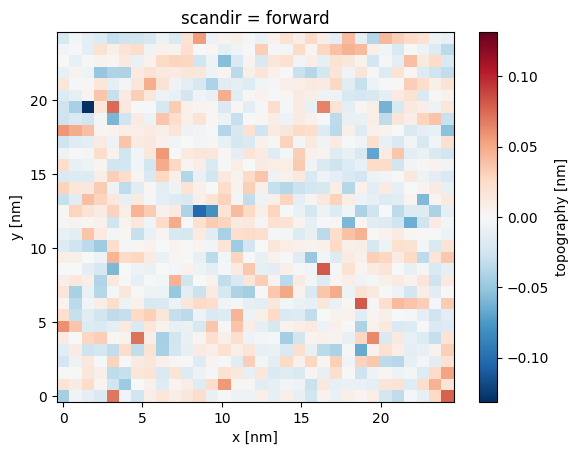

In [26]:
izmap.image.isel(scandir = 0)['topography'].plot()

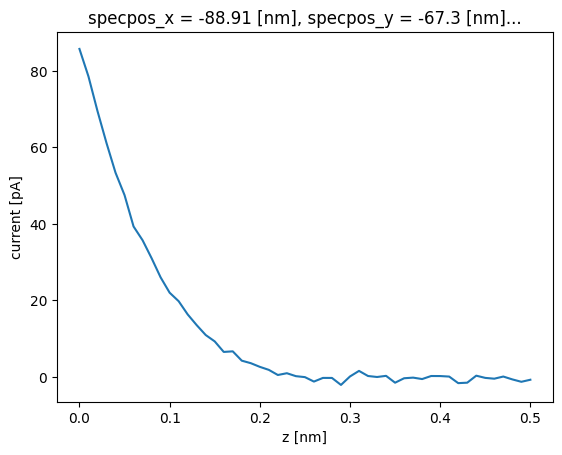

In [32]:
izmap.spectra.isel(zscandir = 0, repetitions = 0, specpos_x = 0, specpos_y = 0)['current'].plot()

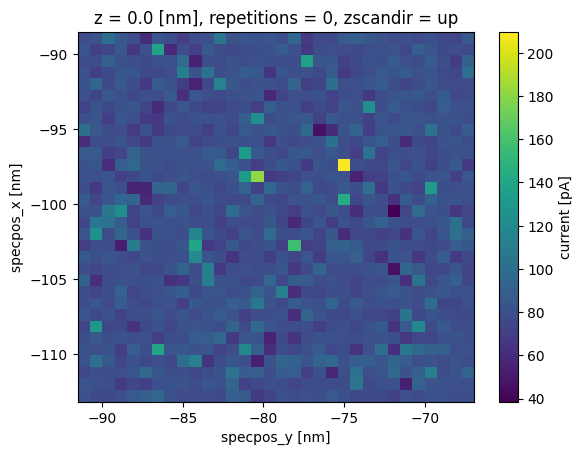

In [18]:
izmap.spectra.isel(zscandir = 0, repetitions = 0).sel(z = 0, method='nearest')['current'].plot()

In [28]:
izmap_abs = rhkpy.coord_to_absolute(izmap.image)

newlengths: 28.906250337801254 28.906250337801254
11.718750136946454 11.718750136946454


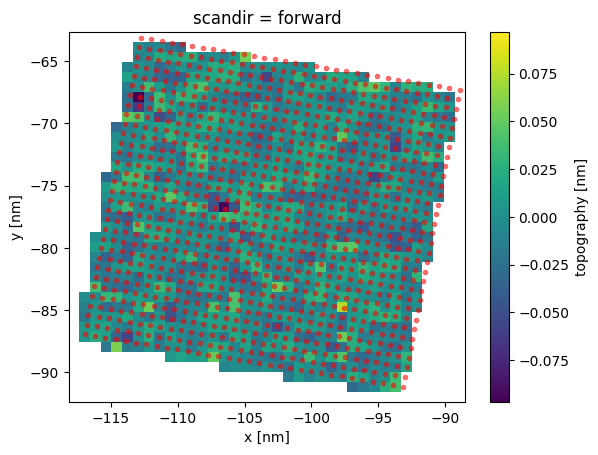

In [30]:
izmap_abs.isel(scandir = 0)['topography'].plot(cmap = 'viridis')
pl.scatter(izmap.spectra['x'].data, izmap.spectra['y'].data, marker = '.', alpha = 0.5, color = 'r')

In [36]:
izmap.spymdata.Topography_Forward.attrs['RHK_Angle']

-10.0

## <a id='toc9_2_'></a>[Iz single spectrum](#toc0_)

In [31]:
filename_izspec = 'Iz_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_15_28_529.sm4'
izspec = rhkpy.rhkdata(filename_izspec)

In [116]:
print(izspec.datatype, izspec.spectype, izspec.numberofspectra, izspec.repetitions)

spec iz 20 10


In [39]:
izspec.spectra.attrs

{'filename': 'Iz_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_15_28_529.sm4',
 'speccoord_x': -97.14440096786348,
 'speccoord_y': -73.07891536356692,
 'speccoord_x units': 'nm',
 'speccoord_y units': 'nm',
 'bias': 0.6,
 'bias units': 'V',
 'setpoint': 39.99999984016789,
 'setpoint units': 'pA',
 'measurement date': '09/07/21',
 'measurement time': '10:15:22'}

In [33]:
izspec.spectra

<xarray.Dataset>
Dimensions:      (z: 51, repetitions: 10, zscandir: 2)
Coordinates:
  * z            (z) float64 0.0 0.01 0.02 0.03 0.04 ... 0.46 0.47 0.48 0.49 0.5
  * repetitions  (repetitions) int64 0 1 2 3 4 5 6 7 8 9
  * zscandir     (zscandir) <U4 'up' 'down'
Data variables:
    current      (z, repetitions, zscandir) float64 36.76 31.97 ... 0.4858
    x            float64 -97.14
    y            float64 -73.08
Attributes: (12/18)
    filename:           Iz_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_15_28_529.sm4
    speccoord_x:        -97.14440096786348
    speccoord_y:        -73.07891536356692
    speccoord_x units:  nm
    speccoord_y units:  nm
    bias:               0.6
    ...                 ...
    LI amplitude unit:  mV
    LI frequency:       1266.9999999999998
    LI frequency unit:  Hz
    LI phase:           -104.9999999
    datatype:           spec
    spectype:           iz

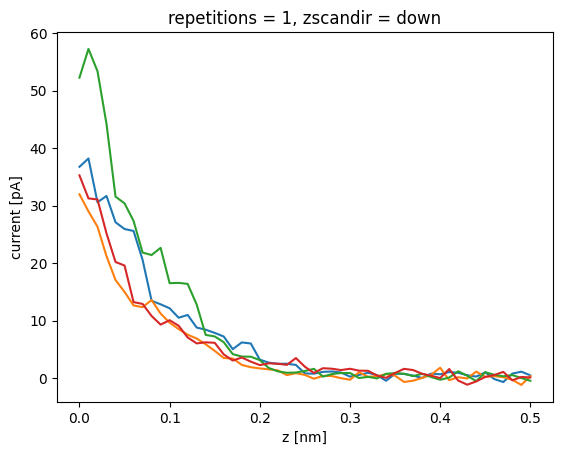

In [32]:
izspec.spectra.isel(zscandir = 0, repetitions = 0)['current'].plot()
izspec.spectra.isel(zscandir = 1, repetitions = 0)['current'].plot()
izspec.spectra.isel(zscandir = 0, repetitions = 1)['current'].plot()
izspec.spectra.isel(zscandir = 1, repetitions = 1)['current'].plot()

# <a id='toc10_'></a>[Iz line spectrum](#toc0_)

In [53]:
izlinespec = rhkpy(filename_izline)

In [54]:
izlinespec.repetitions

10

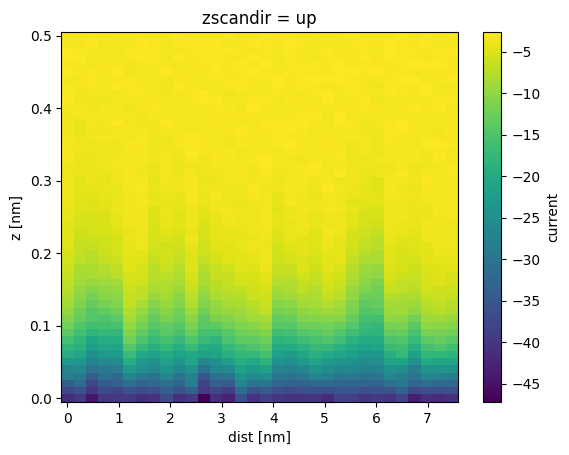

In [55]:
izlinespec.spectra.isel(zscandir=0).mean(dim='repetitions')['current'].plot()

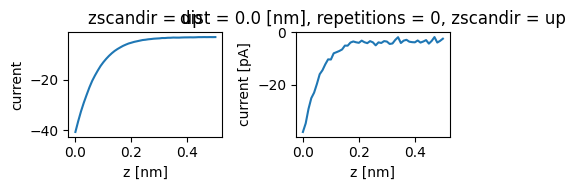

In [56]:
fig, (ax1, ax2) = pl.subplots(1, 2, figsize = (4.7, 2))
izlinespec.spectra.isel(zscandir=0).mean(dim=['repetitions', 'dist'])['current'].plot(ax=ax1)
izlinespec.spectra.isel(zscandir=0, repetitions=0, dist=0)['current'].plot(ax=ax2)
pl.tight_layout()

# <a id='toc11_'></a>[Implementing repetitions](#toc0_)

In [50]:
filename_izmap = 'Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743.sm4'
izmap = rhkpy(filename_izmap)

In [51]:
izmap.repetitions

10

In [21]:
filename_map_large = 'C:/Users/zrbyt/OneDrive - energia.mta.hu/Documents/work_MFA/cikkek - published/2022/RG magnetism/figures/splitting/9K_ABC6_2020_11_02_08_47_19_209.sm4'
mapspec = rhkpy(filename_map_large)

In [22]:
mapspec.repetitions

1

In [23]:
mapspec.numberofspectra

2

In [24]:
mapspec.spymdata.Topography_Forward.attrs['RHK_ScanType'], mapspec.spymdata.Topography_Forward.attrs['RHK_ScanTypeName']

(0, 'RHK_SCAN_RIGHT')